In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

matplotlib.rcParams['figure.figsize'] = (12, 5)

In [9]:
data = pd.read_csv('data/s&p500.csv')

In [10]:
data.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.2 KB


In [13]:
# resample to predict only weekly (average) sales

data.set_index('Date', inplace=True)

In [22]:
data.head()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [28]:
sub14_18 = data.loc['2014': '2018']

In [30]:
sp1418=sub14_18['SP500']

<AxesSubplot:xlabel='Date'>

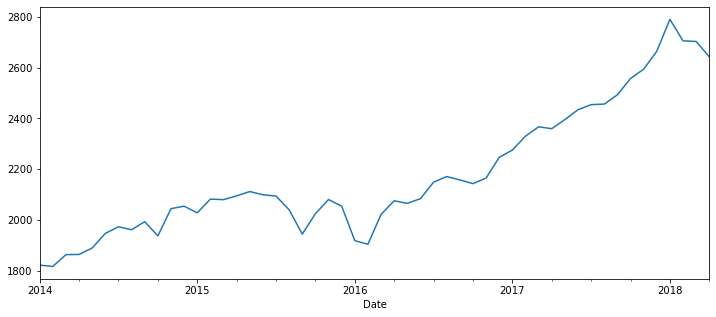

In [34]:
sp1418.resample('M').sum().plot()

In [36]:
# missing values imputation by interpoation

series = pd.Series([1,2,2.5,3, 3.5, 4, 4.55, 4.557, 4.6, np.nan, 5.55, 5.6, np.nan])

In [38]:
series.interpolate()

0     1.000
1     2.000
2     2.500
3     3.000
4     3.500
5     4.000
6     4.550
7     4.557
8     4.600
9     5.075
10    5.550
11    5.600
12    5.600
dtype: float64

<AxesSubplot:xlabel='Date'>

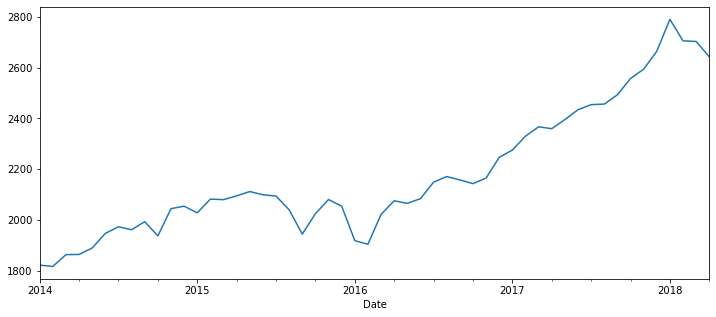

In [41]:
sp1418.plot()

In [39]:
sp1418.head()

Date
2014-01-01    1822.36
2014-02-01    1817.04
2014-03-01    1863.52
2014-04-01    1864.26
2014-05-01    1889.77
Name: SP500, dtype: float64

In [40]:
sp1418.tail()

Date
2017-12-01    2664.34
2018-01-01    2789.80
2018-02-01    2705.16
2018-03-01    2702.77
2018-04-01    2642.19
Name: SP500, dtype: float64

In [42]:
# step1
train_start = '2014-01-01'
test_start = '2017-01-01'

# step 2
train= sp1418[(sp1418.index >= train_start) & (sp1418.index < test_start)]
test= sp1418[sp1418.index >= test_start]

print('training data shape: ', train.shape)
print('testing data shape: ', test.shape)

training data shape:  (36,)
testing data shape:  (16,)


In [43]:
print(len(train))
print(len(test))

36
16


In [ ]:
# next we fit the model with the training set and then compare the prediction by the testing set.